# External Validity

## Import libraries

In [1]:
#!pip install statsmodels

In [2]:
#!pip install matplotlib seaborn

In [3]:
#!pip install scikit-learn

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.proportion import proportions_ztest

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Tasks

### Primacy Effect

#### Task 1.

 **What is the conversion difference in group A and group B?**

In [5]:
df = pd.read_csv('external_validity_homework_2.csv',
                 parse_dates=['date_in_app', 'first_date_in_app'])

In [6]:
df

,user_id,sample_type,date_in_app,first_date_in_app,day_of_test,conv_to_contact_daily
0,00018D9EB5E146AA8B578E427AEC323A,A,2023-07-02,2023-07-02,22,0
1,00018D9EB5E146AA8B578E427AEC323A,A,2023-07-06,2023-07-02,26,0
2,00018D9EB5E146AA8B578E427AEC323A,A,2023-07-08,2023-07-02,28,0
3,00018D9EB5E146AA8B578E427AEC323A,A,2023-07-09,2023-07-02,29,0
4,00027C4F85D64F4A81E95ECCCA1634FE,B,2023-06-14,2023-06-14,4,0
...,...,...,...,...,...,...
713951,FFFE37BB811E410F9617079E4F74CB8A,A,2023-07-04,2023-06-28,24,1
713952,FFFE37BB811E410F9617079E4F74CB8A,A,2023-07-03,2023-06-28,23,1
713953,FFFE37BB811E410F9617079E4F74CB8A,A,2023-07-05,2023-06-28,25,1
713954,FFFE37BB811E410F9617079E4F74CB8A,A,2023-07-08,2023-06-28,28,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713956 entries, 0 to 713955
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                713956 non-null  object        
 1   sample_type            713956 non-null  object        
 2   date_in_app            713956 non-null  datetime64[ns]
 3   first_date_in_app      713956 non-null  datetime64[ns]
 4   day_of_test            713956 non-null  int64         
 5   conv_to_contact_daily  713956 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 32.7+ MB


In [8]:
df.user_id.nunique()

97041

In [9]:
df_exp = df.groupby(['user_id', 'sample_type'], as_index=False) \
    .agg({'conv_to_contact_daily': 'max'})

df_exp

,user_id,sample_type,conv_to_contact_daily
0,00018D9EB5E146AA8B578E427AEC323A,A,0
1,00027C4F85D64F4A81E95ECCCA1634FE,B,0
2,000372E63801450086F7C385F3EFA844,B,1
3,0003A45019354C9C88F0D42D1C7DFB7C,B,1
4,0005769859DE4BFD9BB266A007231F2B,B,1
...,...,...,...
97036,FFFBDEC2FD98444CBDCA4E1F0028EB7B,A,0
97037,FFFCB6AE38FB4A9586735543F89C2704,A,1
97038,FFFCD3187A434DAE9F81984043CEE349,A,0
97039,FFFE37BB811E410F9617079E4F74CB8A,A,1


In [10]:
df_exp.sample_type.value_counts()

A    48750
B    48291
Name: sample_type, dtype: int64

In [11]:
conv_res = df_exp.groupby('sample_type', as_index=False).agg({'conv_to_contact_daily': 'mean'})

conv_res

,sample_type,conv_to_contact_daily
0,A,0.878626
1,B,0.864799


In [12]:
conv_res.conv_to_contact_daily[1] - conv_res.conv_to_contact_daily[0]

-0.01382681722824608

#### Task 2.  

**Check the proportion in each group using a two-tailed z-test for proportion. And specify the z-statistic obtained in the test.** 

In [13]:
grp_a = df_exp[df_exp['sample_type'] == 'A'].conv_to_contact_daily
grp_b = df_exp[df_exp['sample_type'] == 'B'].conv_to_contact_daily

In [14]:
count = [sum([x for x in grp_a if x > 0]), sum([x for x in grp_b if x > 0])]
nobs = [len(grp_a), len(grp_b)]

proportions_ztest(count, nobs)[0]

6.440699209685541

#### Task 3. 

**Can we reject H0 if alpha = 0.05?**

In [15]:
if proportions_ztest(count, nobs)[1] < 0.05:
    print('Yes, we can reject H0!')
else:
    print('We are not able to reject H0.')

Yes, we can reject H0!


#### Task 4. 

**We have to check if there is a primacy effect on our data.**

In [16]:
df['ret_day'] = df['date_in_app'] - df['first_date_in_app']

In [17]:
df['ret_day'] = df['ret_day'].dt.days

In [18]:
df['user_type'] = pd.cut(df['ret_day'], bins=[-1, 3, 1000], labels=['new', 'old'])

In [19]:
to_plot = df.groupby(['day_of_test', 'sample_type', 'user_type'], as_index=False) \
    .agg({'conv_to_contact_daily': 'mean'})

In [20]:
to_plot['user_cat'] = to_plot['sample_type'].str.cat(to_plot['user_type'], sep=' - ')

to_plot

,day_of_test,sample_type,user_type,conv_to_contact_daily,user_cat
0,0,A,new,0.756906,A - new
1,0,A,old,0.800440,A - old
2,0,B,new,0.732095,B - new
3,0,B,old,0.355282,B - old
4,1,A,new,0.729223,A - new
...,...,...,...,...,...
115,28,B,old,0.797143,B - old
116,29,A,new,0.743386,A - new
117,29,A,old,0.828243,A - old
118,29,B,new,0.787709,B - new


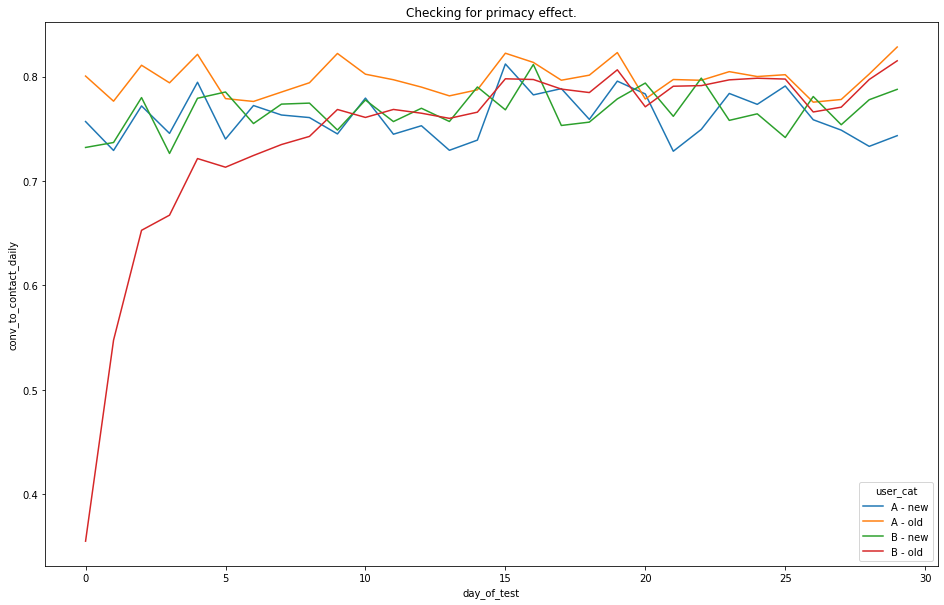

In [21]:
plt.figure(figsize=(16,10))

sns.lineplot(data=to_plot, x='day_of_test', y='conv_to_contact_daily', hue='user_cat')
plt.title('Checking for primacy effect.');

There is a primacy effect based on what we can see on the graph above. 

#### Task 5. 

**Calculate the average daily share of new users by test days (what share of new users are in the daily traffic on average for the test period)**

In [22]:
new_day_rate_df = df.groupby(['day_of_test', 'user_type'], as_index=False).agg({'user_id': 'count'})

new_day_rate_df.head(6)

,day_of_test,user_type,user_id
0,0,new,739
1,0,old,20714
2,1,new,715
3,1,old,22552
4,2,new,789
5,2,old,22743


In [23]:
days = new_day_rate_df.day_of_test.unique().tolist()
new_cnt_lst = []

for day in days:
    temp_df = new_day_rate_df[new_day_rate_df['day_of_test'] == day]
    new_cnt = temp_df.user_id.values[0]
    all_cnt = temp_df.user_id.values[0] + temp_df.user_id.values[1]
    new_cnt_lst.append(new_cnt / all_cnt)
    
    
pd.DataFrame({'day_of_test': days,
              'new_rate': new_cnt_lst}).new_rate.mean()

0.032877969036562114

#### Task 6. 

**What is the absolute value of the difference in effects between the "old" group and the new group on the 3rd day of the test (day_of_test == 2)?**

In [24]:
day_3_dif = df[(df['day_of_test'] == 2) & (df['sample_type'] == 'B')] \
    .groupby('user_type', as_index=False) \
    .agg({'conv_to_contact_daily': 'mean'})

day_3_dif

,user_type,conv_to_contact_daily
0,new,0.779841
1,old,0.652813


In [25]:
day_3_dif.conv_to_contact_daily[0] - day_3_dif.conv_to_contact_daily[1]

0.1270273795994542

#### Task 7. 

**Calculate on what day of the test the difference in effects between the "new" group and the "old" group of users first becomes negative.**

In [26]:
day_dif = df[df['sample_type'] == 'B'] \
    .groupby(['day_of_test', 'user_type'], as_index=False) \
    .agg({'conv_to_contact_daily': 'mean'})

day_dif.head(6)

,day_of_test,user_type,conv_to_contact_daily
0,0,new,0.732095
1,0,old,0.355282
2,1,new,0.736842
3,1,old,0.547685
4,2,new,0.779841
5,2,old,0.652813


In [27]:
days = day_dif.day_of_test.unique().tolist()
rate_dif_lst = []

for day in days:
    temp_df = day_dif[day_dif['day_of_test'] == day]
    new_rate = temp_df.conv_to_contact_daily.values[0]
    old_rate = temp_df.conv_to_contact_daily.values[1]
    rate_dif_lst.append(new_rate - old_rate)
    
for i in range(len(rate_dif_lst)):
    if rate_dif_lst[i] < 0:
        print(i+1)
        break

10


### Novelty Effect 

#### Task 8. 

 **What is the conversion difference in group A and group B?**

In [28]:
df = pd.read_csv('novelty_effect_homework_2.csv',
                 parse_dates=['date_in_app', 'first_date_in_app'])

In [29]:
df

,user_id,sample_type,date_in_app,total_contacts,first_date_in_app,day_of_test,conv_to_contact_daily
0,000015E6362C47CFBA851EA91D417F8B,A,2023-06-10,1.0,2023-01-12,0,1
1,000015E6362C47CFBA851EA91D417F8B,A,2023-06-29,5.0,2023-01-12,19,1
2,0000FF6D0FAE419384034F249C4DC10B,B,2023-06-22,1.0,2023-01-02,12,1
3,0000FF6D0FAE419384034F249C4DC10B,B,2023-06-18,10.0,2023-01-02,8,1
4,00028A57EC044DA2ADD1F07F93296838,A,2023-07-04,1.0,2023-01-16,24,1
...,...,...,...,...,...,...,...
855677,FFFEF3D68226457AB8AEDA3145394370,B,2023-06-23,6.0,2023-01-02,13,1
855678,FFFEF3D68226457AB8AEDA3145394370,B,2023-06-24,NaN,2023-01-02,14,0
855679,FFFF53FED90942A8B9848507AFC86DA3,B,2023-06-12,19.0,2023-02-15,2,1
855680,FFFFC2B7BC7B47D99824B292CAB6E4E2,A,2023-07-02,NaN,2023-01-01,22,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855682 entries, 0 to 855681
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                855682 non-null  object        
 1   sample_type            855682 non-null  object        
 2   date_in_app            855682 non-null  datetime64[ns]
 3   total_contacts         681855 non-null  float64       
 4   first_date_in_app      855682 non-null  datetime64[ns]
 5   day_of_test            855682 non-null  int64         
 6   conv_to_contact_daily  855682 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 45.7+ MB


In [31]:
df.user_id.nunique()

116782

In [32]:
df_exp = df.groupby(['user_id', 'sample_type'], as_index=False) \
    .agg({'conv_to_contact_daily': 'max'})

In [33]:
df_exp

,user_id,sample_type,conv_to_contact_daily
0,000015E6362C47CFBA851EA91D417F8B,A,1
1,0000FF6D0FAE419384034F249C4DC10B,B,1
2,00028A57EC044DA2ADD1F07F93296838,A,1
3,00028EA31D6D43E79DE5F9117DB7EE67,A,1
4,00039480581B409C96E9B8D979C06000,B,1
...,...,...,...
116777,FFFD90AAF8304B71ADE6EFCD20F5484D,B,0
116778,FFFE9C57842D49528B500331871ED989,B,1
116779,FFFEF3D68226457AB8AEDA3145394370,B,1
116780,FFFF53FED90942A8B9848507AFC86DA3,B,1


In [34]:
df_exp.sample_type.value_counts()

B    58459
A    58323
Name: sample_type, dtype: int64

In [35]:
conv_res = df_exp.groupby('sample_type', as_index=False).agg({'conv_to_contact_daily': 'mean'})

conv_res

,sample_type,conv_to_contact_daily
0,A,0.881350
1,B,0.892437


In [36]:
conv_res.conv_to_contact_daily[1] - conv_res.conv_to_contact_daily[0]

0.011087024139181167

#### Task 9.  

**Check the proportion in each group using a two-tailed z-test for proportion. And specify the z-statistic obtained in the test.** 

In [37]:
grp_a = df_exp[df_exp['sample_type'] == 'A'].conv_to_contact_daily
grp_b = df_exp[df_exp['sample_type'] == 'B'].conv_to_contact_daily

In [38]:
count = [sum([x for x in grp_a if x > 0]), sum([x for x in grp_b if x > 0])]
nobs = [len(grp_a), len(grp_b)]

proportions_ztest(count, nobs)[0]

-5.9814249972504445

#### Task 10. 

**Can we reject H0 if alpha = 0.05?**

In [39]:
if proportions_ztest(count, nobs)[1] < 0.05:
    print('Yes, we can reject H0!')
else:
    print('We are not able to reject H0.')

Yes, we can reject H0!


#### Task 11. 

**We have to check if there is a primacy effect on our data.**

In [40]:
to_plot = df.groupby(['day_of_test', 'sample_type'], as_index=False) \
    .agg({'conv_to_contact_daily': 'mean'})

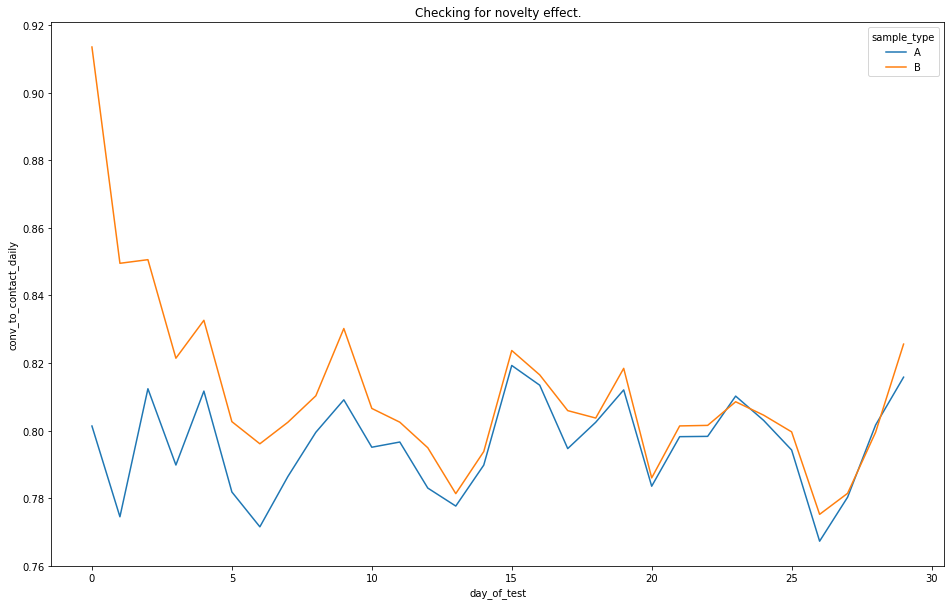

In [41]:
plt.figure(figsize=(16,10))

sns.lineplot(data=to_plot, x='day_of_test', y='conv_to_contact_daily', hue='sample_type')
plt.title('Checking for novelty effect.');

It looks like that we have a novelty effect in our data based on what we can see on the graph above. But we have to check it using a regression model. 

In [42]:
days = to_plot.day_of_test.unique().tolist()
conv_a_lst = []
conv_b_lst = []

for day in days:
    temp_df = to_plot[to_plot['day_of_test'] == day]
    conv_a_lst.append(temp_df.conv_to_contact_daily.values[0])
    conv_b_lst.append(temp_df.conv_to_contact_daily.values[1])

res_df = pd.DataFrame({
    'day_of_test': [x + 1 for x in days],
    'conv_a': conv_a_lst,
    'conv_b': conv_b_lst
})

In [43]:
res_df['delta'] = res_df['conv_b'] - res_df['conv_a']

In [44]:
# polynomial coefficients of the regression calibration equation
alpha = 0.35
gamma = 2

# regression parameters (using LinkedIn approach)
res_df['d_1'] = 1 / (res_df['day_of_test']**alpha)
res_df['d_2'] = 1 / (res_df['day_of_test']**gamma)

# train and test data
x = res_df[['d_1','d_2']].values
Y = res_df['delta'].values

# initializing and training our model
lin_reg = LinearRegression(fit_intercept = True)
lin_reg.fit(x, Y)

# predicting the delta values using the fitted linear regression model
res_df['delta_pred'] = lin_reg.predict(x)

res_df.head()

,day_of_test,conv_a,conv_b,delta,d_1,d_2,delta_pred
0,1,0.801359,0.913524,0.112166,1.000000,1.000000,0.115254
1,2,0.774500,0.849515,0.075015,0.784584,0.250000,0.058938
2,3,0.812389,0.850587,0.038198,0.680781,0.111111,0.042166
3,4,0.789817,0.821426,0.031609,0.615572,0.062500,0.033429
4,5,0.811692,0.832643,0.020951,0.569325,0.040000,0.027791


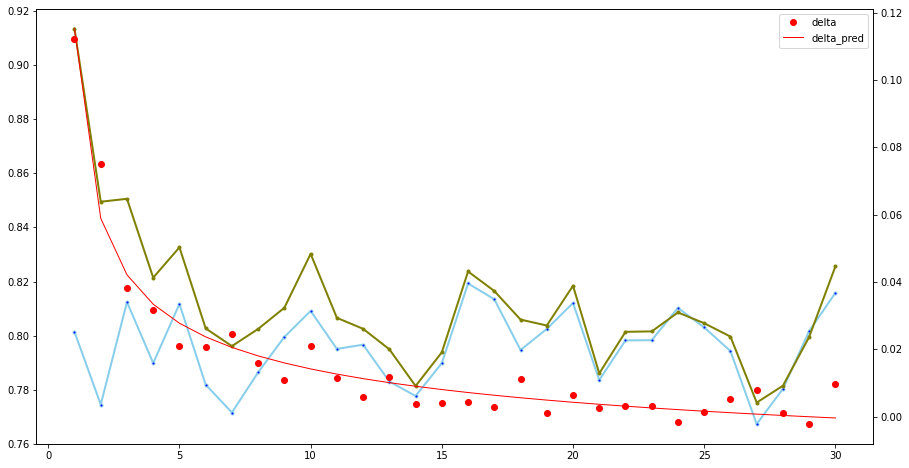

In [45]:
fig, ax1 = plt.subplots(figsize=(15, 8))

# second axis for deltas
ax2 = ax1.twinx()

ax1.plot('day_of_test', 'conv_a', data=res_df, marker='o', markerfacecolor='blue', markersize=3, color='skyblue', linewidth=2)
ax1.plot('day_of_test', 'conv_b', data=res_df, marker='o', markerfacecolor='olive', markersize=3, color='olive', linewidth=2)
ax2.plot('day_of_test', 'delta', data=res_df, marker='o', color='red', linewidth=0)
ax2.plot('day_of_test', 'delta_pred', data=res_df, marker='', color='red', linewidth=1)

plt.legend()
plt.show()

In [46]:
r2 = r2_score(Y, res_df.delta_pred)

r2

0.9528913361460096

In [47]:
if r2 >= 0.8:
    print('There is a novelty effect in data!')
else:
    print('There is no novelty effect in our data.')

There is a novelty effect in data!
